In [3]:
pip install pandas matplotlib seaborn statsmodels scikit-learn

In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%config InlineBackend.figure_format = "retina"

import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [5]:
# Carga el dataset
df_orig = pd.read_csv("/content/CSV/avocado.csv")
df_orig

# Copia del dataframe para preservar datos originales
df = df_orig.copy()

# 1. Descomposición de Series Temporales de Precios:


In [ ]:
# Convierte 'Date' a tipo datetime
df['Date'] = pd.to_datetime(df['Date'])

#Para poder escoger un número de period que tenga sentido en seasonal_decompose primero vamos a entender qué datos tengo

# Crear las columnas 'año', 'mes' y 'día'
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# Crear una columna 'dia_semana' que tenga el nombre del día de la semana
df['dia_semana'] = df['Date'].dt.day_name()

# Visualizar el resultado
print(df[['Date', 'year', 'Month','dia_semana']].head())

#Ver qué días tengo registros de entrada en mi tabla
df['dia_semana'].unique()

        Date  year  Month dia_semana
0 2015-12-27  2015     12     Sunday
1 2015-12-20  2015     12     Sunday
2 2015-12-13  2015     12     Sunday
3 2015-12-06  2015     12     Sunday
4 2015-11-29  2015     11     Sunday


array(['Sunday'], dtype=object)

In [6]:
# Step 1: Define the unique regions and manually classify them
region_classification = {
    'Albany': 'City',
    'Atlanta': 'City',
    'BaltimoreWashington': 'Region',
    'Boise': 'City',
    'Boston': 'City',
    'BuffaloRochester': 'Region',
    'California': 'GreaterRegion',
    'Charlotte': 'City',
    'Chicago': 'City',
    'CincinnatiDayton': 'Region',
    'Columbus': 'City',
    'DallasFtWorth': 'Region',
    'Denver': 'City',
    'Detroit': 'City',
    'GrandRapids': 'City',
    'GreatLakes': 'GreaterRegion',
    'HarrisburgScranton': 'Region',
    'HartfordSpringfield': 'Region',
    'Houston': 'City',
    'Indianapolis': 'City',
    'Jacksonville': 'City',
    'LasVegas': 'City',
    'LosAngeles': 'City',
    'Louisville': 'City',
    'MiamiFtLauderdale': 'Region',
    'Midsouth': 'GreaterRegion',
    'Nashville': 'City',
    'NewOrleansMobile': 'Region',
    'NewYork': 'City',
    'Northeast': 'GreaterRegion',
    'NorthernNewEngland': 'Region',
    'Orlando': 'City',
    'Philadelphia': 'City',
    'PhoenixTucson': 'Region',
    'Pittsburgh': 'City',
    'Plains': 'GreaterRegion',
    'Portland': 'City',
    'RaleighGreensboro': 'Region',
    'RichmondNorfolk': 'Region',
    'Roanoke': 'City',
    'Sacramento': 'City',
    'SanDiego': 'City',
    'SanFrancisco': 'City',
    'Seattle': 'City',
    'SouthCarolina': 'State',
    'SouthCentral': 'GreaterRegion',
    'Southeast': 'GreaterRegion',
    'Spokane': 'City',
    'StLouis': 'City',
    'Syracuse': 'City',
    'Tampa': 'City',
    'TotalUS': 'TotalUS',
    'West': 'GreaterRegion',
    'WestTexNewMexico': 'Region'
}
def get_regions(name):
  cat_region = region_classification.get(name)
  return cat_region

In [7]:
# Añade columna con categorización de City/Region/GreaterRegion/TotalUS
df['region_type'] = df['region'].transform(lambda x: get_regions(x))

In [8]:
# Prepara filtro de filas para tener en cuenta sólo verdaderamente GreaterRegion
greater_regions = df[df['region_type'].isin(['GreaterRegion'])]
greater_regions

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,region_type
312,0,2015-12-27,0.90,5040365.47,1833946.59,1760956.02,232755.85,1212707.01,1090140.07,110737.35,11829.59,conventional,2015,California,GreaterRegion
313,1,2015-12-20,0.94,4695737.21,1676601.43,1543280.76,266689.82,1209165.20,1061703.58,136747.10,10714.52,conventional,2015,California,GreaterRegion
314,2,2015-12-13,0.87,5259354.30,1806690.08,1627240.76,232985.13,1592438.33,1404012.00,180150.37,8275.96,conventional,2015,California,GreaterRegion
315,3,2015-12-06,0.78,5775536.27,1943065.50,2100246.17,221957.26,1510267.34,1376640.91,126664.37,6962.06,conventional,2015,California,GreaterRegion
316,4,2015-11-29,0.91,4575710.62,1461699.38,1810202.70,222311.07,1081497.47,991568.84,82338.39,7590.24,conventional,2015,California,GreaterRegion
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18232,7,2018-02-04,1.41,283378.47,22474.66,55360.49,133.41,205409.91,70232.59,134666.91,510.41,organic,2018,West,GreaterRegion
18233,8,2018-01-28,1.80,185974.53,22918.40,33051.14,93.52,129911.47,77822.23,51986.86,102.38,organic,2018,West,GreaterRegion
18234,9,2018-01-21,1.83,189317.99,27049.44,33561.32,439.47,128267.76,76091.99,51947.50,228.27,organic,2018,West,GreaterRegion
18235,10,2018-01-14,1.82,207999.67,33869.12,47435.14,433.52,126261.89,89115.78,37133.99,12.12,organic,2018,West,GreaterRegion


In [ ]:
# Group data by Date to study temporal series
gd_4_temp_series = greater_regions[['Date', 'AveragePrice']].groupby('Date').mean()
gd_4_temp_series

,AveragePrice
Date,
2015-01-04,1.262500
2015-01-11,1.309375
2015-01-18,1.332500
2015-01-25,1.348125
2015-02-01,1.195625
...,...
2018-02-25,1.333125
2018-03-04,1.310625
2018-03-11,1.308750


In [ ]:
# Genera la serie temporal
# [period: Expected samples in a full cycle / repetition of the seasonality component]
decomposition = seasonal_decompose(gd_4_temp_series['AveragePrice'], model='additive', period=52)

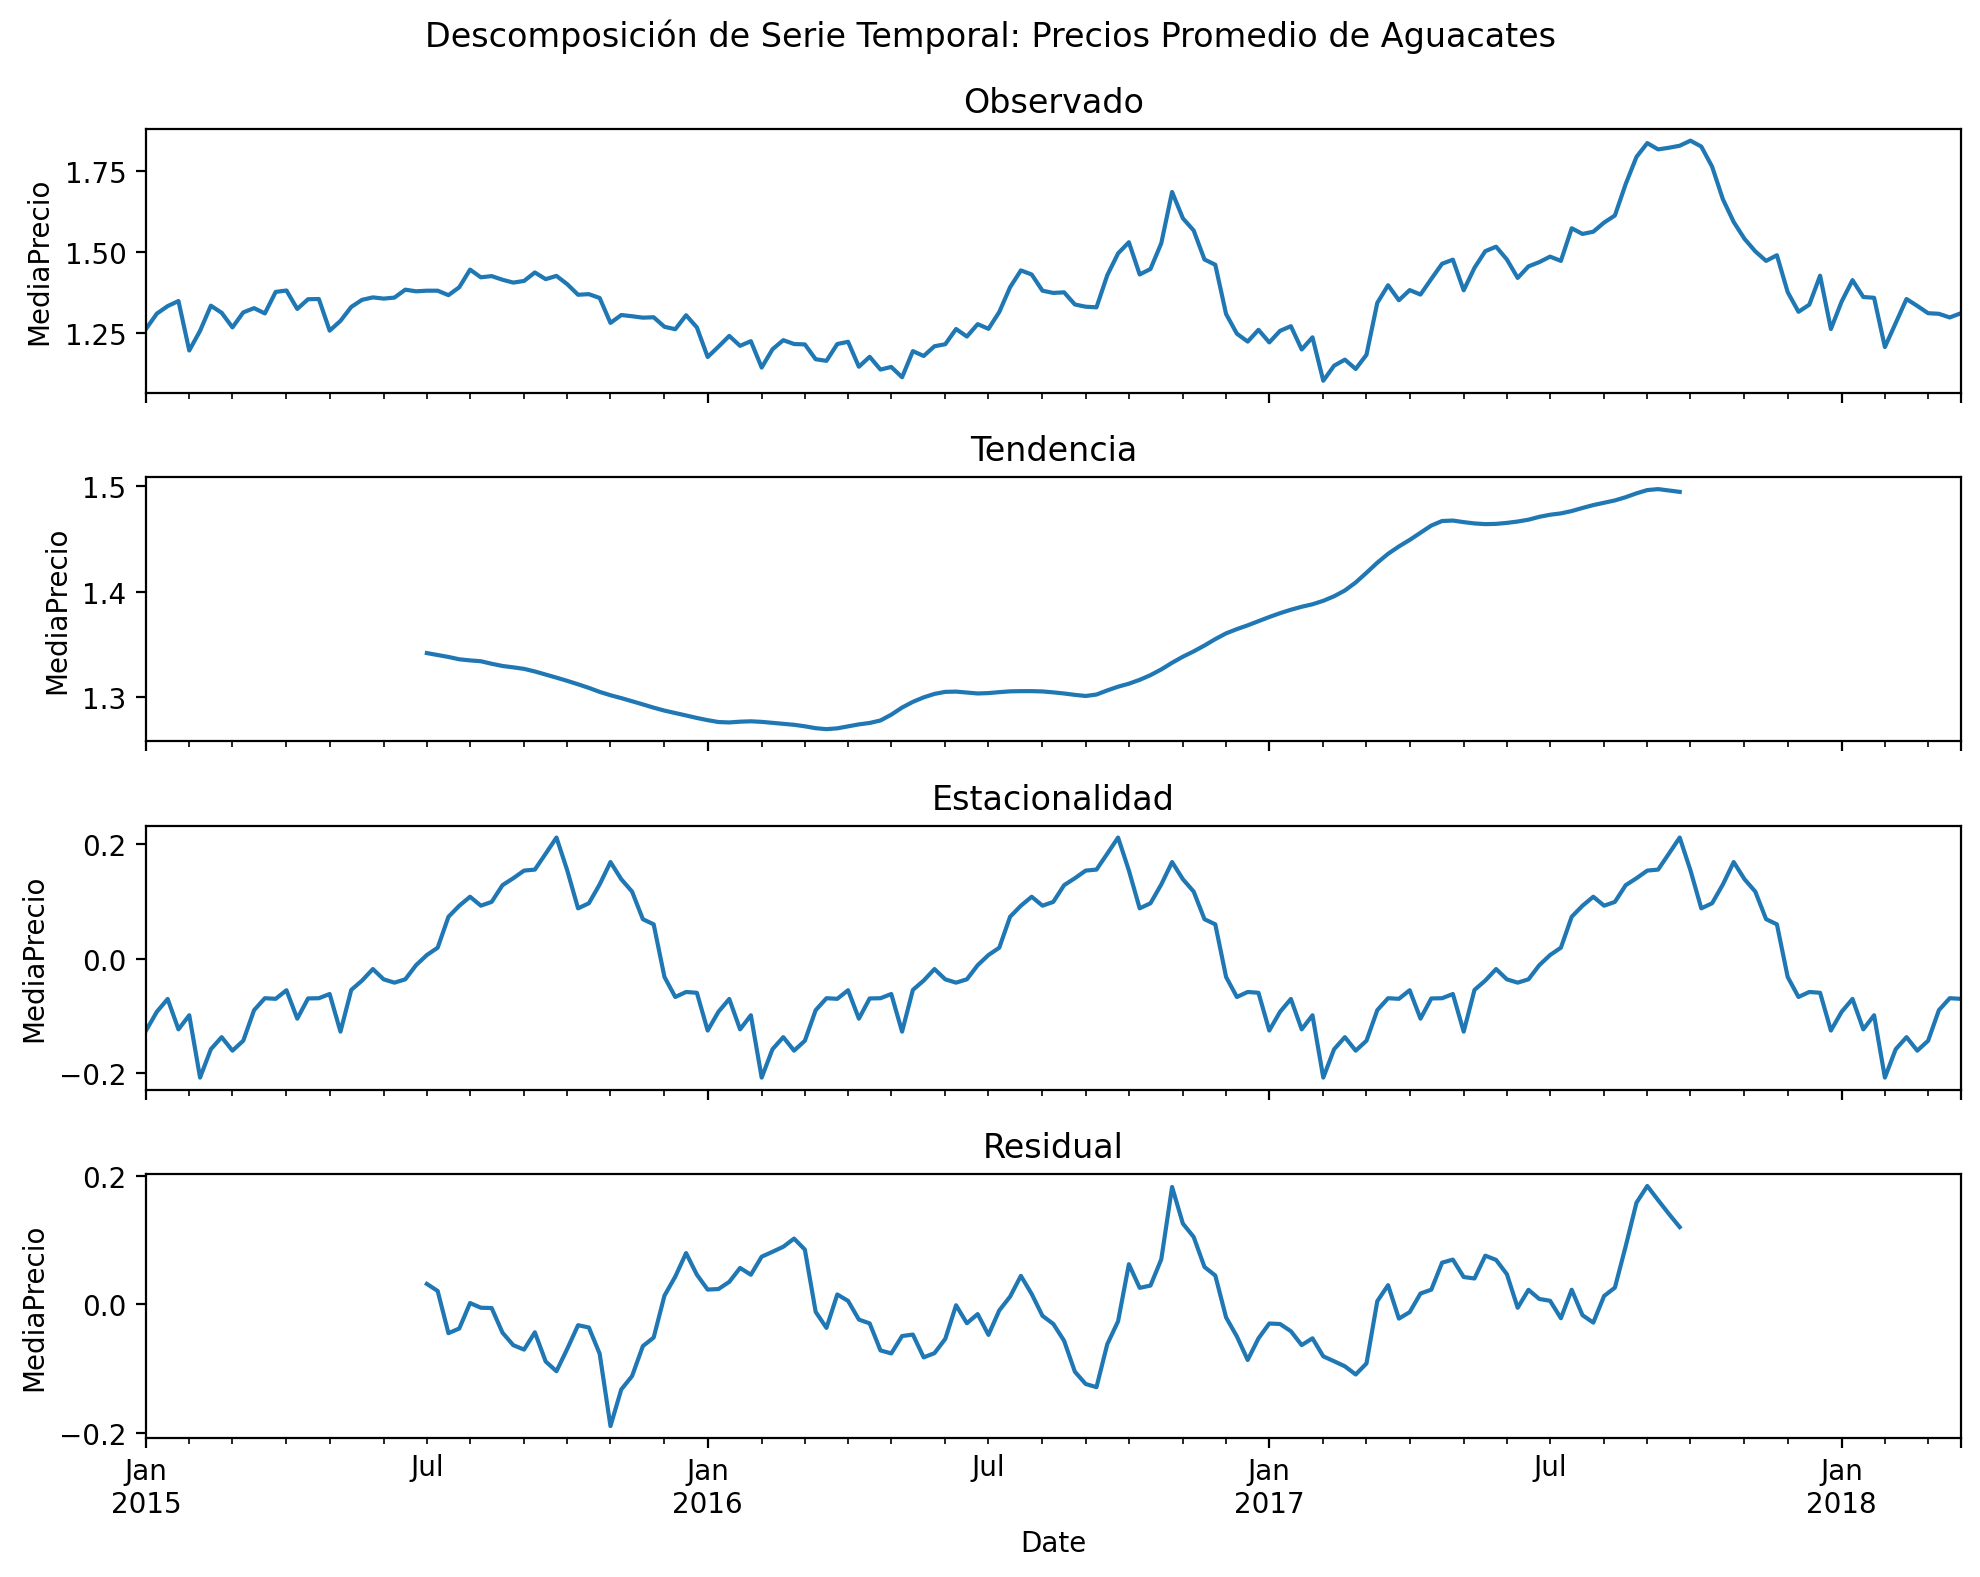

In [ ]:
# Dibuja los componentes de la descomposición
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 8), sharex=True)
fig.suptitle('Descomposición de Serie Temporal: Precios Promedio de Aguacates')
decomposition.observed.plot(ax=ax1, title='Observado', ylabel='MediaPrecio')
decomposition.trend.plot(ax=ax2, title='Tendencia', ylabel='MediaPrecio')
decomposition.seasonal.plot(ax=ax3, title='Estacionalidad', ylabel='MediaPrecio')
decomposition.resid.plot(ax=ax4, title='Residual', ylabel='MediaPrecio')

plt.tight_layout()
plt.show()

Se puede ver que anualmente se repite una bajada en el AveragePrice en el mes de Febrero así como un pico de subida en los meses de Octubre y Noviembre. En septiembre se empieza a acabar la temporada de cosecha del aguacate, y por eso puede subir el precio en Octubre y Noviembre, si le sumamos también que en Noviembre hay el día de Acción de Gracias donde es muy común el uso del aguacate para hacer Guacamole en USA. En invierno, hay mucha exportación de aguacates de México cosa que ayuda a mantener los precios bajos.

Análisis de Estacionalidad por Región

In [18]:
# Definir las columnas que nos van a interesar para que el set de datos de trabajo sea más pequeño
subset = ['region','Date','AveragePrice']
greater_regions = df[df['region_type'].isin(['GreaterRegion'])]

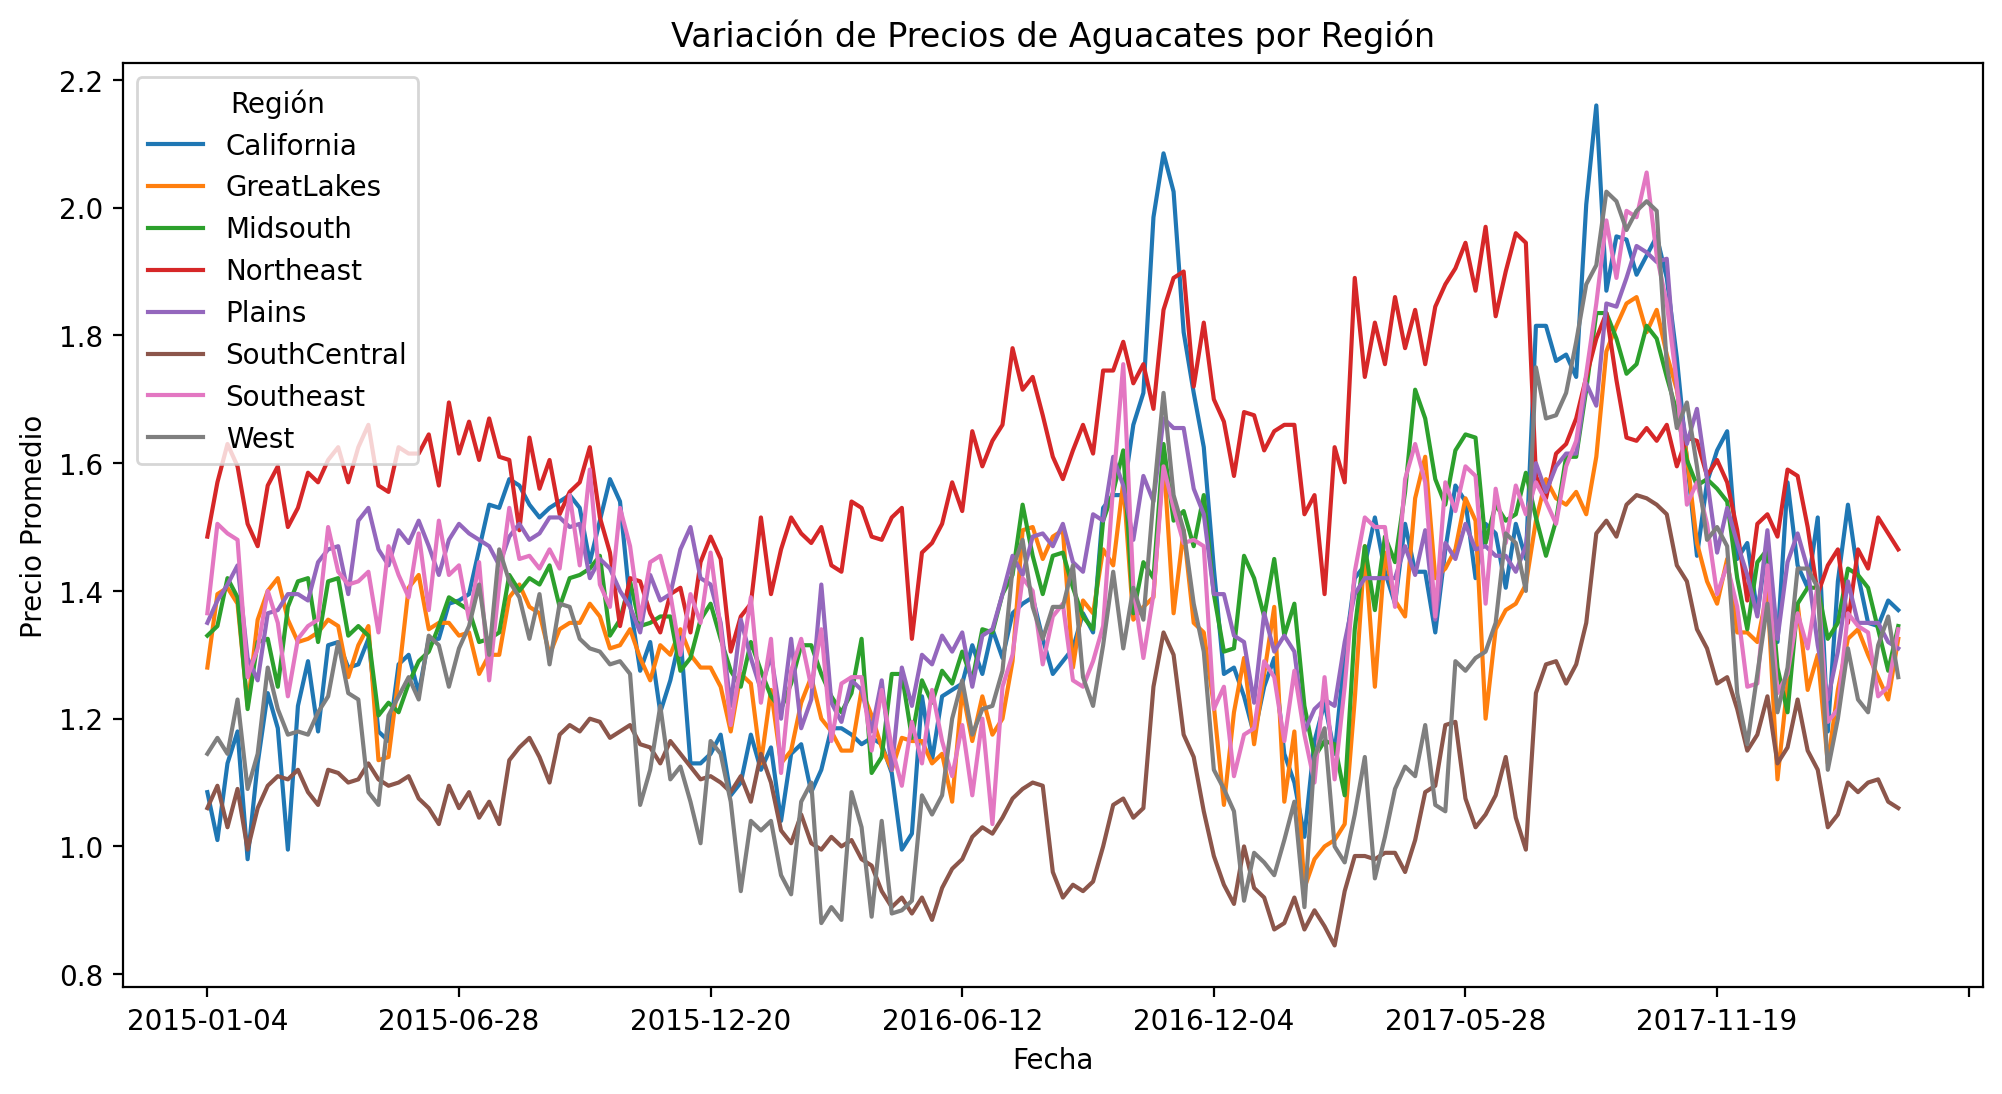

In [19]:
# Filtrar datos para regiones seleccionadas (ejemplo: 5 regiones)
regions = greater_regions['region'] # Valor intercambiable según las regiones que quieras analizar
filtered_data = greater_regions[greater_regions['region'].isin(regions)]

# Agrupar por región y fecha, calculando el promedio de precios
region_price = filtered_data.groupby(['region', 'Date'])['AveragePrice'].mean().unstack('region')

greater_regions[subset].groupby(['region','Date']).mean().reset_index()

# Graficar
region_price.plot(figsize=(12, 6))
plt.title('Variación de Precios de Aguacates por Región')
plt.xlabel('Fecha')
plt.ylabel('Precio Promedio')
plt.legend(title='Región')
plt.show()

Comparación de Precios Promedio Mensuales

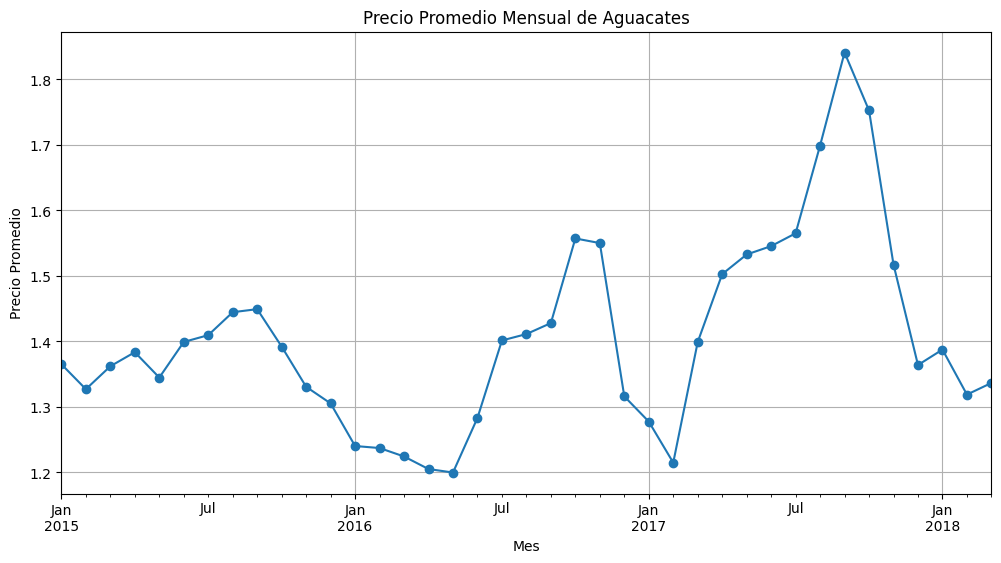

In [ ]:
# Agregar una columna de mes
data['Month'] = data['Date'].dt.to_period('M')

# Agrupar por mes y calcular el promedio
monthly_avg_price = data.groupby('Month')['AveragePrice'].mean()

# Graficar
monthly_avg_price.plot(figsize=(12, 6), marker='o')
plt.title('Precio Promedio Mensual de Aguacates')
plt.xlabel('Mes')
plt.ylabel('Precio Promedio')
plt.grid()
plt.show()

Tendencia de Ventas a lo Largo del Tiempo

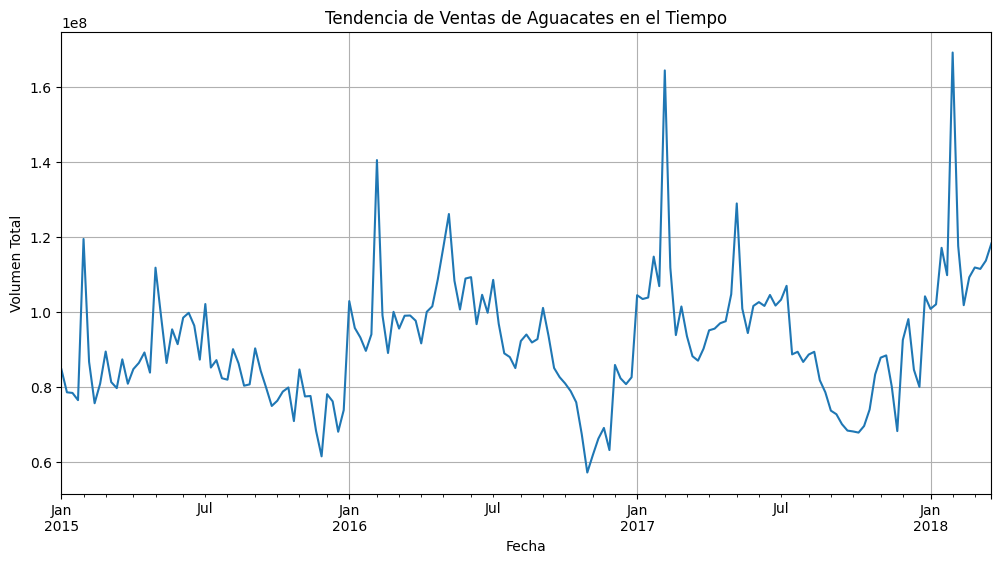

In [ ]:
# Agrupar por fecha y sumar el volumen total
sales_trend = data.groupby('Date')['Total Volume'].sum()

# Graficar
sales_trend.plot(figsize=(12, 6))
plt.title('Tendencia de Ventas de Aguacates en el Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Volumen Total')
plt.grid()
plt.show()


Cambios en Precios Anuales

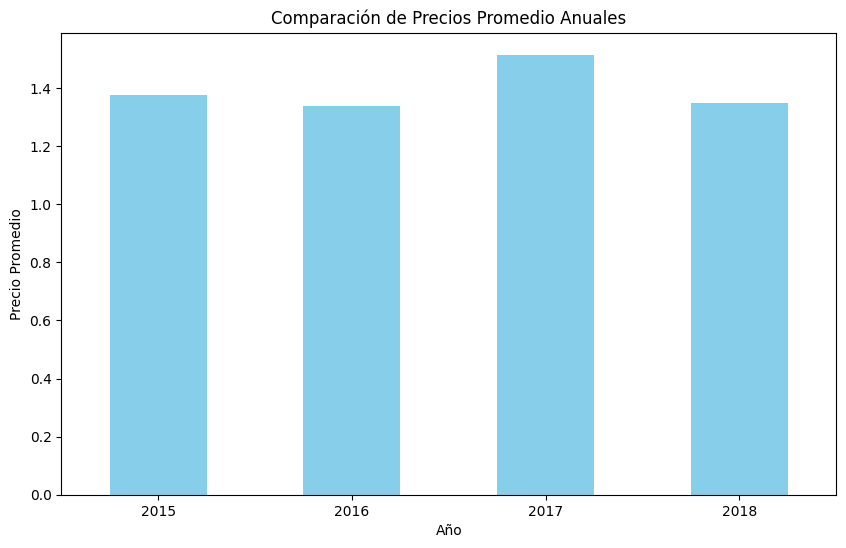

In [ ]:
# Agregar una columna de año
data['Year'] = data['Date'].dt.year

# Agrupar por año y calcular el promedio de precios
annual_avg_price = data.groupby('Year')['AveragePrice'].mean()

# Graficar
annual_avg_price.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Comparación de Precios Promedio Anuales')
plt.xlabel('Año')
plt.ylabel('Precio Promedio')
plt.xticks(rotation=0)
plt.show()